### **MA5204: Aprendizaje de Máquinas**
### **Tarea 1 P2**

**Departamento de Ingeniería Matemática, Universidad de Chile**

**Profesor:** Felipe Tobar

**Ayudantes:** Alejandro Cuevas, Mauricio Araneda, Mauricio Romero

**Integrantes:** Daniel Brauer, Dante Cárcamo

**A)**

In [1]:
# importar módulos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("T1_Housing.csv",
                     delimiter=',',
                     skip_header=1)
print(data)

[[0.00000000e+00 8.14421498e+04 1.47929557e+06 0.00000000e+00]
 [1.00000000e+00 6.64045968e+04 1.16884582e+06 0.00000000e+00]
 [2.00000000e+00 9.09751133e+04 1.54437975e+06 1.00000000e+00]
 [3.00000000e+00 5.42262913e+04 8.14240282e+05 0.00000000e+00]
 [4.00000000e+00 6.99001340e+04 1.59963447e+06 1.00000000e+00]
 [5.00000000e+00 7.74597579e+04 9.45252192e+05 0.00000000e+00]
 [6.00000000e+00 5.45354537e+04 7.32733236e+05 1.00000000e+00]
 [7.00000000e+00 6.12007262e+04 8.94251069e+05 0.00000000e+00]
 [8.00000000e+00 6.41608159e+04 9.85749787e+05 1.00000000e+00]
 [9.00000000e+00 6.87282271e+04 1.78608575e+06 0.00000000e+00]
 [1.00000000e+01 6.33808147e+04 9.32979361e+05 1.00000000e+00]
 [1.10000000e+01 7.59548183e+04 1.05725258e+06 1.00000000e+00]
 [1.20000000e+01 6.44021282e+04 1.03114675e+06 1.00000000e+00]
 [1.30000000e+01 7.62753326e+04 1.46492916e+06 1.00000000e+00]
 [1.40000000e+01 5.88742738e+04 8.49566086e+05 0.00000000e+00]
 [1.50000000e+01 4.38002920e+04 8.09486710e+05 0.000000

In [3]:
#X = Avg Area Income
X = data[:,1]

#In = in sample

In_sample = data[:,3]

X_in = X * In_sample

X_out = X - X_in
X_out = X_out[X_out>0]
X_in = X_in[X_in>0]
#Y = Precio de las casas
Y = data[:,2]

Y_in = Y * In_sample

Y_out = Y - Y_in

Y_in = Y_in[Y_in>0]

Y_out = Y_out[Y_out>0]

In [4]:
print(Y_in + Y_out)

[3023675.31867297 2768480.28021048 1546973.5178914  1931001.97916035
 1827230.4292571  2843338.3331641  1880712.84009912 2274415.87211829
 3192708.58727286 2106482.76523316 2508894.09213737 3185893.80286584
 1316337.68461365 2683328.71271133 2713653.00410568 2717598.12044053
 2961264.33490315 1911054.31694068 2209035.63681382 2750978.39669055
 1637523.11087169 1950940.1621317  1985119.67540794 1672328.24283945
 2364038.46561591]


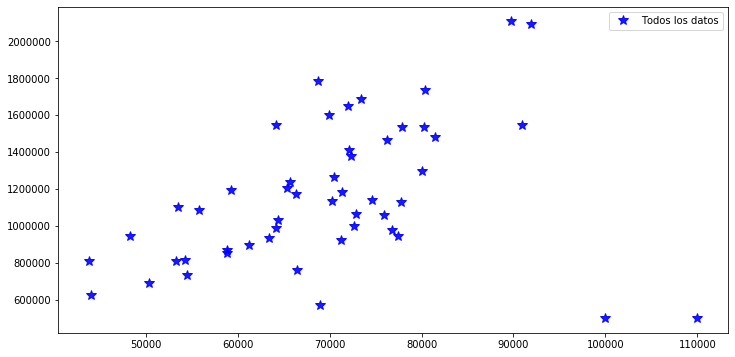

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(X,                     # Datos eje X
         Y,                     # Datos eje y
         c='b',                       # color
         linestyle='',                 # tipo de linea (vacio es sin lineas)
         marker='*',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Todos los datos", # etiqueta leyenda
        )
plt.legend()
plt.show()

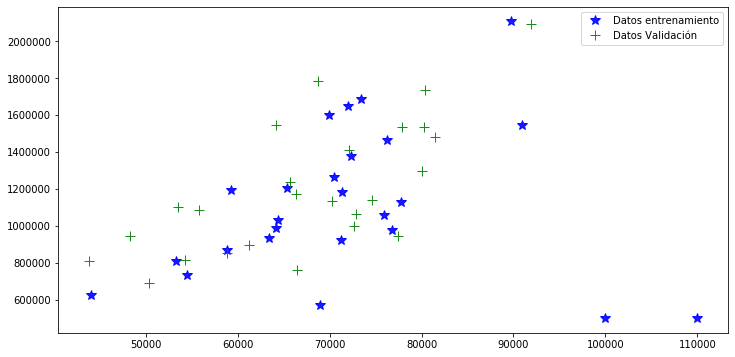

In [6]:

plt.figure(figsize=(12, 6)) # crea figura y detalla tamaño

#Le pasamos los datos a plotear a matplotlib

plt.plot(X_in,                     # Datos eje X
         Y_in,                     # Datos eje y
         c='b',                       # color
         linestyle='',                 # tipo de linea (vacio es sin lineas)
         marker='*',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Datos entrenamiento", # etiqueta leyenda
        )

plt.plot(X_out,                     # Datos eje X
         Y_out,                     # Datos eje y
         c='g',                       # color
         linestyle='',                 # tipo de linea (vacio es sin lineas)
         marker='+',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Datos Validación", # etiqueta leyenda
        )

plt.legend()
plt.show()

**B)**

In [25]:
# Implementación de función reg_lineal(X,Y,rho)
def reg_lineal(X,Y,rho):
    """Devuelve el vector de paámetros theta utilizando regularización ridge"""
    X1 = np.vstack([X,np.ones_like(X)]).T 
    I = np.eye(len(X1.T))
    A = np.linalg.inv(np.dot(X1.T,X1)+(I*rho))
    B = np.dot(X1.T,Y)
    return A.dot(B)  

In [94]:
rho = np.linspace(0 , 10 , 100)
a = np.zeros(len(rho))
b = np.zeros(len(rho))
i=0
for r in rho:
    a[i] = reg_lineal(X_in, Y_in, r)[0]
    b[i] = reg_lineal(X_in, Y_in, r)[1]
    i += 1
theta = np.vstack([a,b])
b

array([856479.10621462, 773156.94278785, 704609.35595271, 647226.66486586,
       598486.5134224 , 556573.13103676, 520146.10689402, 488194.38710579,
       459940.9698591 , 434778.88373901, 412227.0907118 , 391899.43612448,
       373482.35376278, 356718.57516831, 341395.03774273, 327333.781072  ,
       314385.0040078 , 302421.70694279, 291335.51250882, 281033.37300022,
       271434.95252547, 262470.52790212, 254079.29220454, 246207.97364586,
       238809.70346618, 231843.08197835, 225271.40345342, 219062.00919798,
       213185.7447523 , 207616.50216918, 202330.83221091, 197307.61431365,
       192527.7745231 , 187974.04345908, 183630.74783457, 179483.63022492,
       175519.69271955, 171727.06084399, 168094.86475099, 164613.13517688,
       161272.71206581, 158065.16409818, 154982.71763482, 152018.19381616,
       149164.95274485, 146416.84383851, 143768.16157119, 141213.60593323,
       138748.24703301, 136367.49334306, 134067.06316014, 131842.95890609,
       129691.443945  , 1

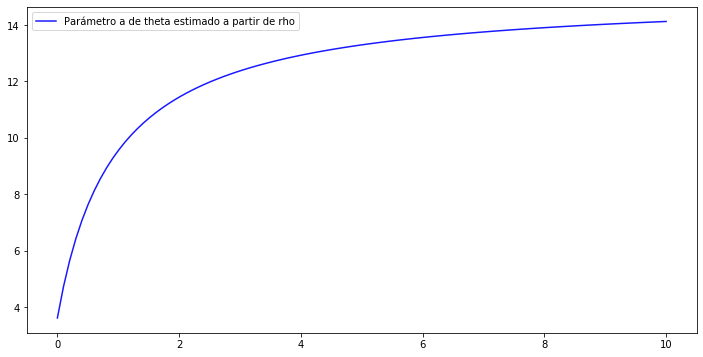

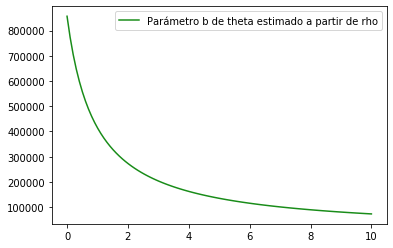

In [96]:
plt.figure(figsize=(12, 6)) # crea figura y detalla tamaño

#Le pasamos los datos a plotear a matplotlib

plt.plot(rho,                     # Datos eje X
         a,                     # Datos eje y
         c='b',                       # color
         linestyle='-',                 # tipo de linea (vacio es sin lineas)
         #marker='*',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Parámetro a de theta estimado a partir de rho", # etiqueta leyenda
        )
plt.legend()
plt.show()

plt.plot(rho,                     # Datos eje X
         b,                     # Datos eje y
         c='g',                       # color
         linestyle='-',                 # tipo de linea (vacio es sin lineas)
         #marker='+',                  # marcador
         ms=10,                       # tamaño de marcador
         alpha=0.9,                   # transparencia
         label="Parámetro b de theta estimado a partir de rho", # etiqueta leyenda
        )

plt.legend()
plt.show()